In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class Qubit:
    def __init__(self):
        """Initialize qubit in the |0> state."""
        self.alpha = 1 + 0j  # Complex number representation of |0⟩
        self.beta = 0 + 0j   # Complex number representation of |1⟩

    def apply_hadamard(self):
        """Apply Hadamard gate (H) to the qubit."""
        new_alpha = (self.alpha + self.beta) / np.sqrt(2)
        new_beta = (self.alpha - self.beta) / np.sqrt(2)
        self.alpha, self.beta = new_alpha, new_beta

    def measure(self):
        """Simulate measurement: Collapse to |0> or |1> based on probabilities."""
        prob_0 = abs(self.alpha) ** 2
        prob_1 = abs(self.beta) ** 2
        result = np.random.choice([0, 1], p=[prob_0, prob_1])
        
        if result == 0:
            self.alpha, self.beta = 1 + 0j, 0 + 0j  # Collapse to |0⟩
        else:
            self.alpha, self.beta = 0 + 0j, 1 + 0j  # Collapse to |1⟩
        
        return result

    def get_bloch_coordinates(self):
        """Convert the qubit state into Bloch Sphere coordinates."""
        theta = 2 * np.arccos(abs(self.alpha))  # Polar angle
        phi = np.angle(self.beta) - np.angle(self.alpha)  # Phase angle
        
        # Convert spherical to Cartesian (x, y, z)
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        
        return x, y, z

def plot_bloch_sphere(qubit):
    """Plot the Bloch Sphere with the qubit's current state."""
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Draw the Bloch sphere
    u, v = np.mgrid[0:2*np.pi:30j, 0:np.pi:15j]
    x = np.cos(u) * np.sin(v)
    y = np.sin(u) * np.sin(v)
    z = np.cos(v)
    ax.plot_wireframe(x, y, z, color="gray", alpha=0.2)

    # Draw axes
    ax.quiver(0, 0, 0, 1, 0, 0, color="r", linestyle="dashed", alpha=0.6)  # x-axis
    ax.quiver(0, 0, 0, 0, 1, 0, color="g", linestyle="dashed", alpha=0.6)  # y-axis
    ax.quiver(0, 0, 0, 0, 0, 1, color="b", linestyle="dashed", alpha=0.6)  # z-axis

    # Plot qubit state
    x_q, y_q, z_q = qubit.get_bloch_coordinates()
    ax.scatter(x_q, y_q, z_q, color="red", s=100, label="Qubit State")

    # Labels and appearance
    ax.set_xlim([-1, 1])
    ax.set_ylim([-1, 1])
    ax.set_zlim([-1, 1])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Bloch Sphere Representation")
    ax.legend()
    plt.show()

Initial state: |0>


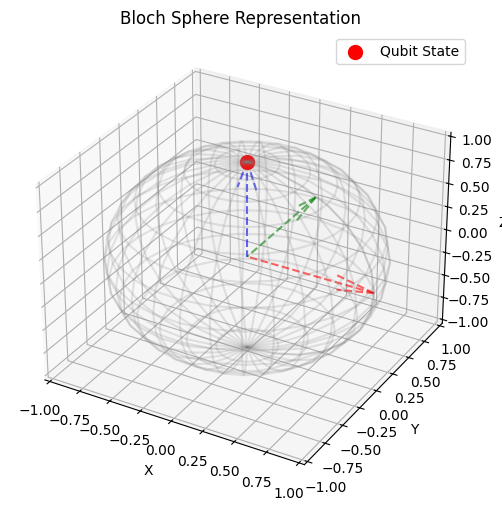

In [2]:
# Example Usage:
qubit = Qubit()
print("Initial state: |0>")
plot_bloch_sphere(qubit)

After Hadamard (Superposition):


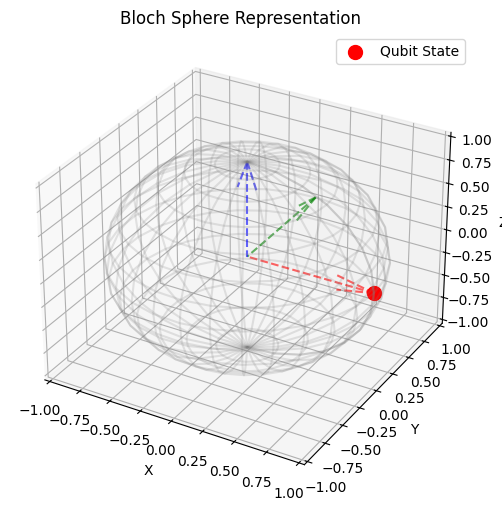

In [3]:
# Apply Hadamard and visualize again
qubit.apply_hadamard()
print("After Hadamard (Superposition):")
plot_bloch_sphere(qubit)

Measurement result: |1>


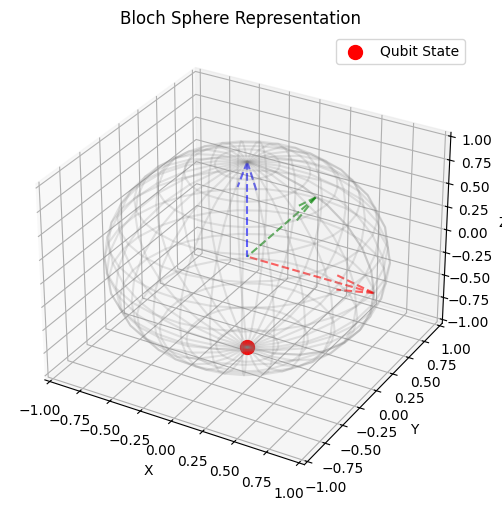

In [4]:
# Measure and visualize after collapse
result = qubit.measure()
print(f"Measurement result: |{result}>")
plot_bloch_sphere(qubit)